# Cell Data Segmentation
### 1. Which classes exist? Are they (roughly) balanced?

In [131]:
import pandas as pd

df = pd.read_csv('segmentation_data.csv')
df.describe()

,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,FiberAlign2Ch3,IntenCoocMaxCh3,IntenCoocMaxCh4,NeighborMinDistCh1,SkewIntenCh4
count,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
mean,90.493405,320.336305,126.071679,189.052115,96.420171,140.701585,1.205859,0.895764,72.660125,1.454076,0.231957,0.246709,29.691933,0.932515
std,48.760000,214.023533,165.008379,158.956105,96.666924,146.634665,0.202522,0.076108,49.028338,0.252347,0.204030,0.183398,11.501550,0.885901
min,0.030876,150.000000,15.160400,1.000000,0.120000,0.563265,1.005831,0.510623,25.760355,1.000000,0.014286,0.013423,10.083350,-1.004442
25%,53.892205,193.000000,35.364158,44.998570,33.495693,40.679740,1.065236,0.856972,43.532759,1.290022,0.051171,0.107596,22.547068,0.403460
50%,90.588770,253.000000,62.343173,173.506300,67.431250,90.250000,1.148620,0.913262,55.810304,1.469231,0.179775,0.211886,27.642860,0.728311
75%,126.682013,362.500000,143.187800,279.289704,127.341651,191.170410,1.280514,0.955606,79.909902,1.647809,0.353311,0.337116,34.079173,1.225431
max,179.939323,2186.000000,1418.634831,989.509800,1205.512000,886.837500,2.900320,0.996499,442.773196,2.000000,0.968326,0.940367,126.993700,8.069013


In [132]:
from pandas import DataFrame

""""
Calculate the class distribution ratio of a feature by using the feature with the least samples as the basis for the calculation
"""
def ratio(df: DataFrame, feature: str):
    g = df.groupby([feature]).size().to_frame(name = "samples")
    min_samples = g.iloc[:, 0].min()
    g['ratio'] = round(g.iloc[:, 0] / min_samples, 1)
    return g

ratio(df, "Class")

,samples,ratio
Class,,
PS,1300,1.8
WS,719,1.0


There are two different classes (`PS`, `WS`), they are not balanced with `PS` having `1300` instances and `WS` `719`

### 2. Which noteworthy trends of features and relations between features aswell as features and Class do you see?

In [133]:
df.describe()

,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,FiberAlign2Ch3,IntenCoocMaxCh3,IntenCoocMaxCh4,NeighborMinDistCh1,SkewIntenCh4
count,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
mean,90.493405,320.336305,126.071679,189.052115,96.420171,140.701585,1.205859,0.895764,72.660125,1.454076,0.231957,0.246709,29.691933,0.932515
std,48.760000,214.023533,165.008379,158.956105,96.666924,146.634665,0.202522,0.076108,49.028338,0.252347,0.204030,0.183398,11.501550,0.885901
min,0.030876,150.000000,15.160400,1.000000,0.120000,0.563265,1.005831,0.510623,25.760355,1.000000,0.014286,0.013423,10.083350,-1.004442
25%,53.892205,193.000000,35.364158,44.998570,33.495693,40.679740,1.065236,0.856972,43.532759,1.290022,0.051171,0.107596,22.547068,0.403460
50%,90.588770,253.000000,62.343173,173.506300,67.431250,90.250000,1.148620,0.913262,55.810304,1.469231,0.179775,0.211886,27.642860,0.728311
75%,126.682013,362.500000,143.187800,279.289704,127.341651,191.170410,1.280514,0.955606,79.909902,1.647809,0.353311,0.337116,34.079173,1.225431
max,179.939323,2186.000000,1418.634831,989.509800,1205.512000,886.837500,2.900320,0.996499,442.773196,2.000000,0.968326,0.940367,126.993700,8.069013


In [134]:
df.corr()

/tmp/ipykernel_82111/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,FiberAlign2Ch3,IntenCoocMaxCh3,IntenCoocMaxCh4,NeighborMinDistCh1,SkewIntenCh4
AngleCh1,1.000000,-0.025281,-0.026470,0.022270,-0.008911,0.006931,-0.039384,0.032881,-0.040770,-0.011776,0.005589,0.009855,0.054098,0.028063
AreaCh1,-0.025281,1.000000,-0.039965,-0.163522,-0.139592,-0.084072,0.320712,-0.489944,-0.074990,-0.143195,0.038674,-0.015260,0.231252,0.075870
AvgIntenCh1,-0.026470,-0.039965,1.000000,0.516892,0.276232,0.394118,-0.238587,0.315972,0.942705,-0.054437,0.124660,-0.176615,-0.043701,-0.141429
AvgIntenCh2,0.022270,-0.163522,0.516892,1.000000,0.191390,0.599178,-0.448929,0.438276,0.485847,-0.066706,0.226547,-0.242853,-0.095988,-0.236903
AvgIntenCh3,-0.008911,-0.139592,0.276232,0.191390,1.000000,0.390760,0.007011,0.089375,0.441698,-0.020619,-0.326386,-0.134638,0.022199,-0.079956
AvgIntenCh4,0.006931,-0.084072,0.394118,0.599178,0.390760,1.000000,-0.259174,0.274304,0.386716,-0.062946,-0.165345,-0.477101,0.024899,-0.420889
ConvexHullAreaRatioCh1,-0.039384,0.320712,-0.238587,-0.448929,0.007011,-0.259174,1.000000,-0.716921,-0.193268,0.050550,-0.283276,0.216181,0.103121,0.274447
ConvexHullPerimRatioCh1,0.032881,-0.489944,0.315972,0.438276,0.089375,0.274304,-0.716921,1.000000,0.276235,0.027547,0.216211,-0.118948,-0.163567,-0.169147
DiffIntenDensityCh1,-0.040770,-0.074990,0.942705,0.485847,0.441698,0.386716,-0.193268,0.276235,1.000000,-0.046196,0.087012,-0.160157,-0.051174,-0.114899
FiberAlign2Ch3,-0.011776,-0.143195,-0.054437,-0.066706,-0.020619,-0.062946,0.050550,0.027547,-0.046196,1.000000,-0.019200,0.107769,-0.003185,0.060125


Intens have a high correlation with the average of the inten since they are contained in that average.

/tmp/ipykernel_82111/5730663.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(), fignum=f.number)


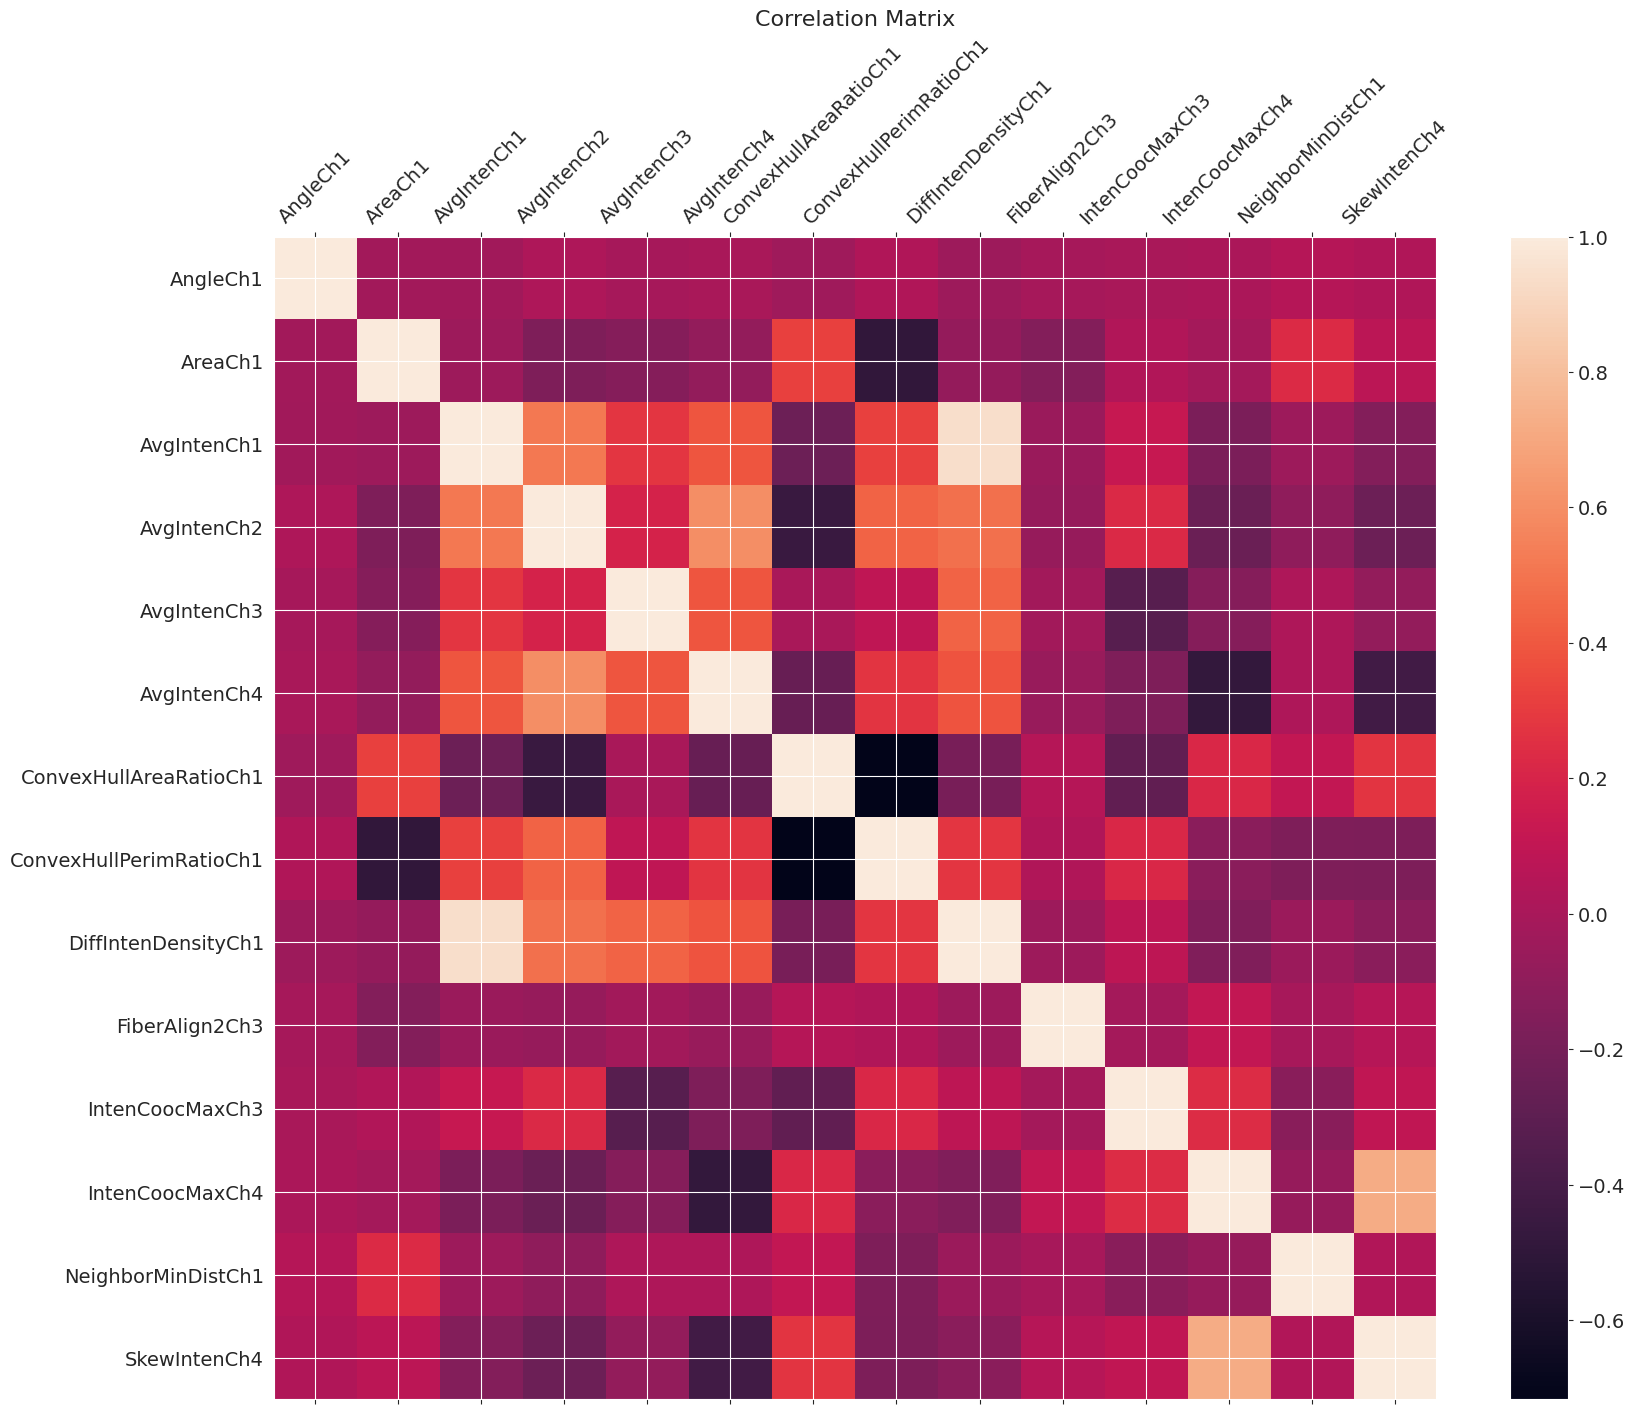

In [135]:
# from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [136]:
df.dtypes

Class                       object
AngleCh1                   float64
AreaCh1                      int64
AvgIntenCh1                float64
AvgIntenCh2                float64
AvgIntenCh3                float64
AvgIntenCh4                float64
ConvexHullAreaRatioCh1     float64
ConvexHullPerimRatioCh1    float64
DiffIntenDensityCh1        float64
FiberAlign2Ch3             float64
IntenCoocMaxCh3            float64
IntenCoocMaxCh4            float64
NeighborMinDistCh1         float64
SkewIntenCh4               float64
dtype: object

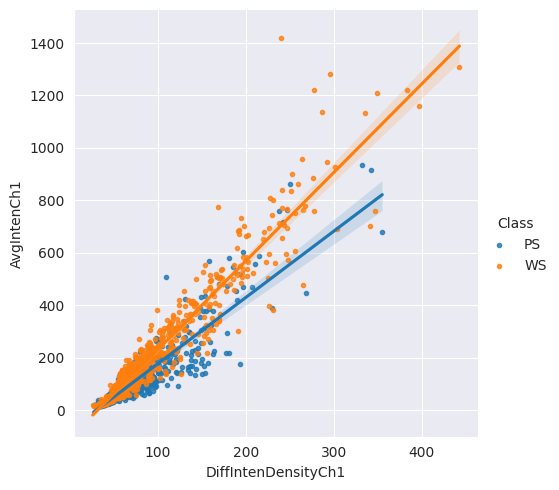

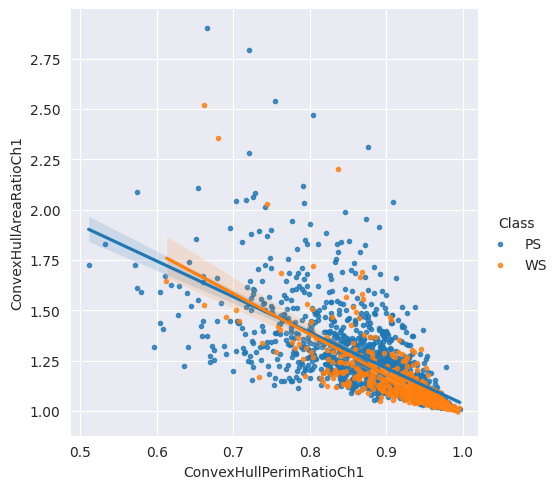

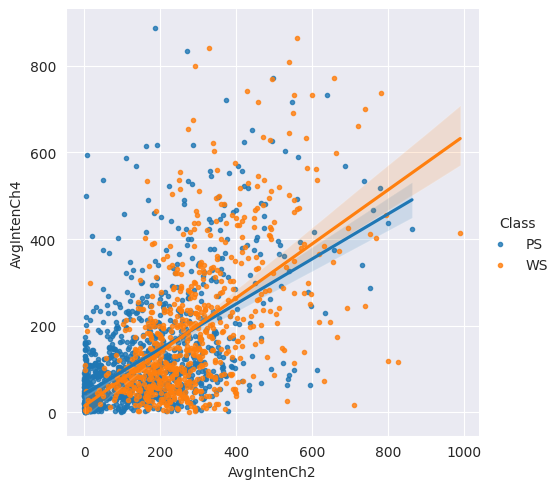

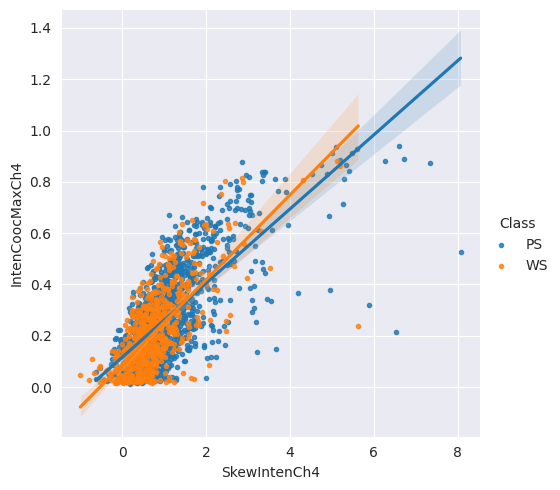

In [137]:
import seaborn as sns
def lmplot_by_class(data, x, y):
    sns.lmplot(x=x, y=y, data=df, hue="Class", markers=[".", "."], fit_reg=True)

lmplot_by_class(x="DiffIntenDensityCh1", y="AvgIntenCh1", data=df)
lmplot_by_class(x="ConvexHullPerimRatioCh1", y="ConvexHullAreaRatioCh1", data=df)
lmplot_by_class(x="AvgIntenCh2", y="AvgIntenCh4", data=df)
lmplot_by_class(x="SkewIntenCh4", y="IntenCoocMaxCh4", data=df)


Feature ConvexHullAreaRatioCh1 and ConvexHullPerimRatioCh1 have a negative correlation
# TODO

AngleCh1                      AxesSubplot(0.125,0.53;0.0945122x0.35)
AreaCh1                    AxesSubplot(0.238415,0.53;0.0945122x0.35)
AvgIntenCh1                AxesSubplot(0.351829,0.53;0.0945122x0.35)
AvgIntenCh2                AxesSubplot(0.465244,0.53;0.0945122x0.35)
AvgIntenCh3                AxesSubplot(0.578659,0.53;0.0945122x0.35)
AvgIntenCh4                AxesSubplot(0.692073,0.53;0.0945122x0.35)
ConvexHullAreaRatioCh1     AxesSubplot(0.805488,0.53;0.0945122x0.35)
ConvexHullPerimRatioCh1       AxesSubplot(0.125,0.11;0.0945122x0.35)
DiffIntenDensityCh1        AxesSubplot(0.238415,0.11;0.0945122x0.35)
FiberAlign2Ch3             AxesSubplot(0.351829,0.11;0.0945122x0.35)
IntenCoocMaxCh3            AxesSubplot(0.465244,0.11;0.0945122x0.35)
IntenCoocMaxCh4            AxesSubplot(0.578659,0.11;0.0945122x0.35)
NeighborMinDistCh1         AxesSubplot(0.692073,0.11;0.0945122x0.35)
SkewIntenCh4               AxesSubplot(0.805488,0.11;0.0945122x0.35)
dtype: object

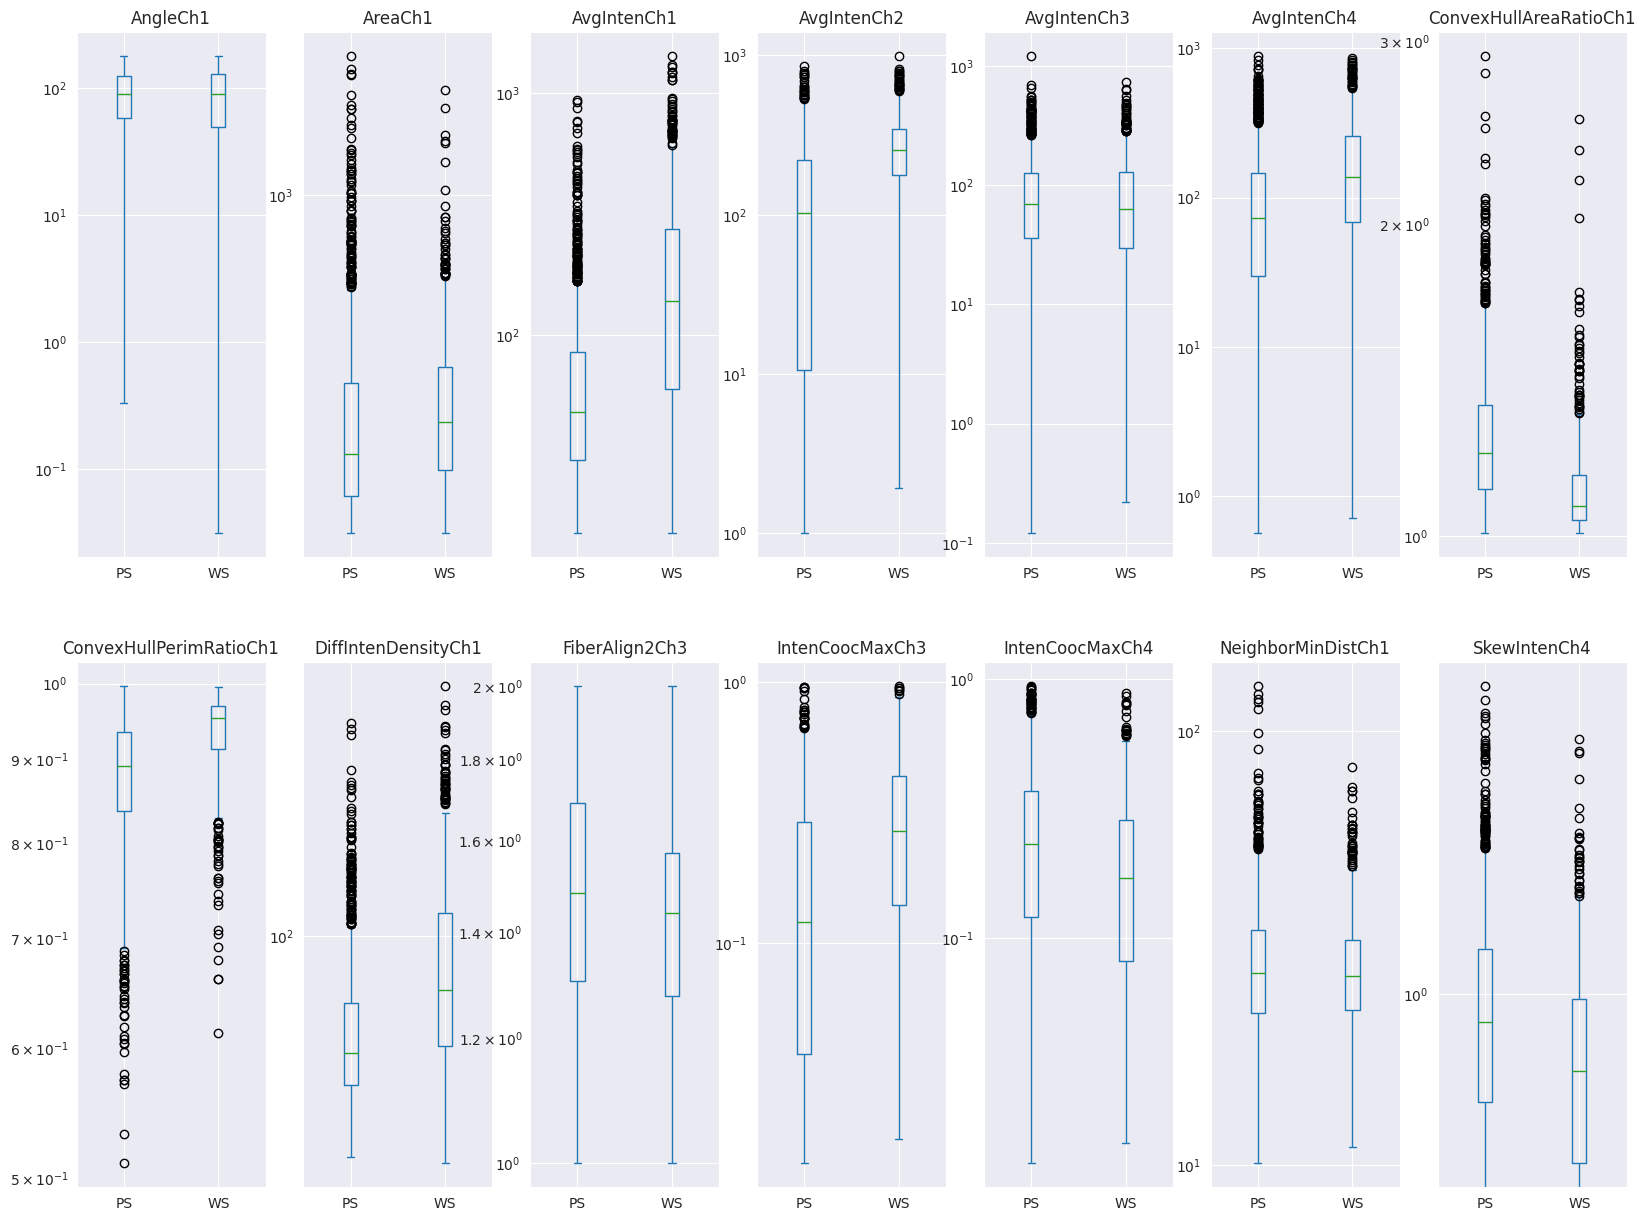

In [138]:
df.plot.box(by='Class', figsize=(20, 15), logy=True, layout=(2, 7))

PS         AxesSubplot(0.1,0.15;0.363636x0.75)
WS    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

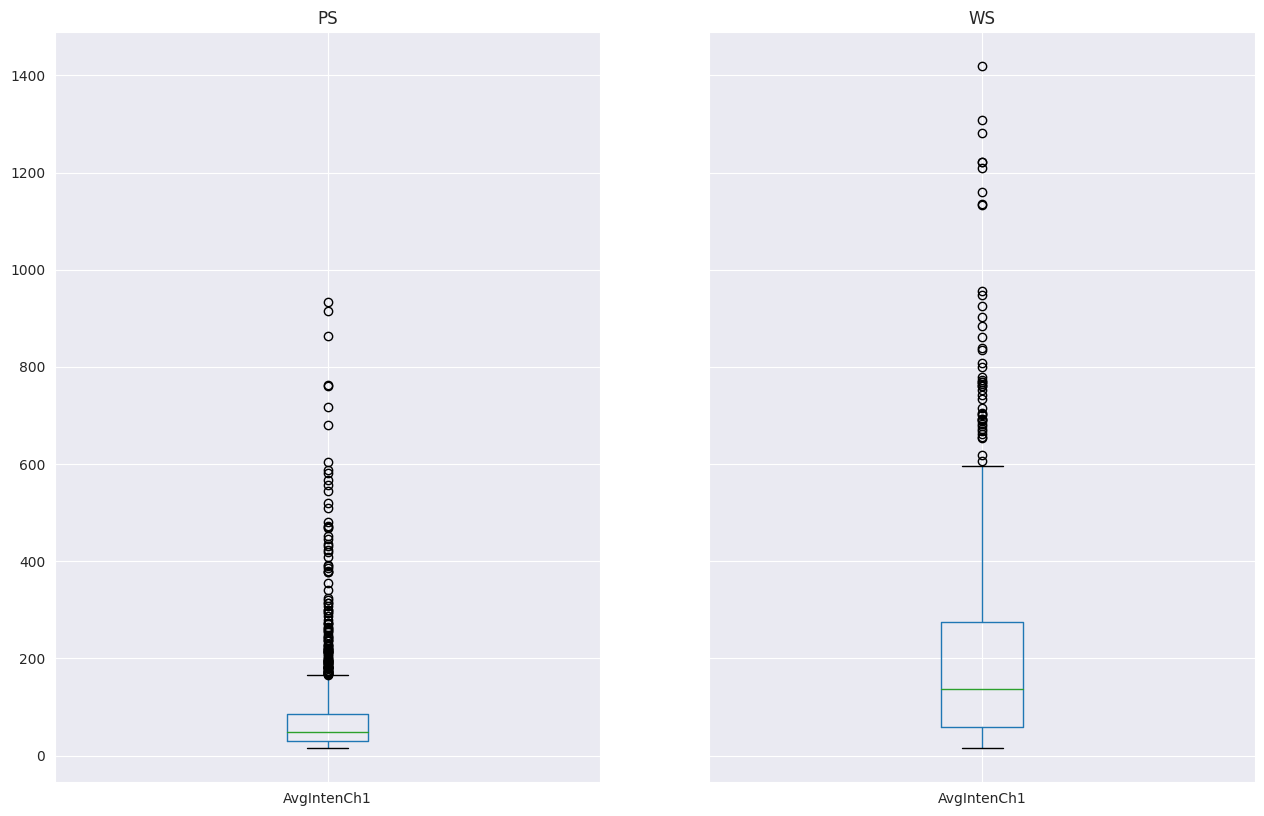

In [139]:
g = df.groupby(by="Class")
g[['AvgIntenCh1']].boxplot(figsize=(15, 10))

PS         AxesSubplot(0.1,0.15;0.363636x0.75)
WS    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

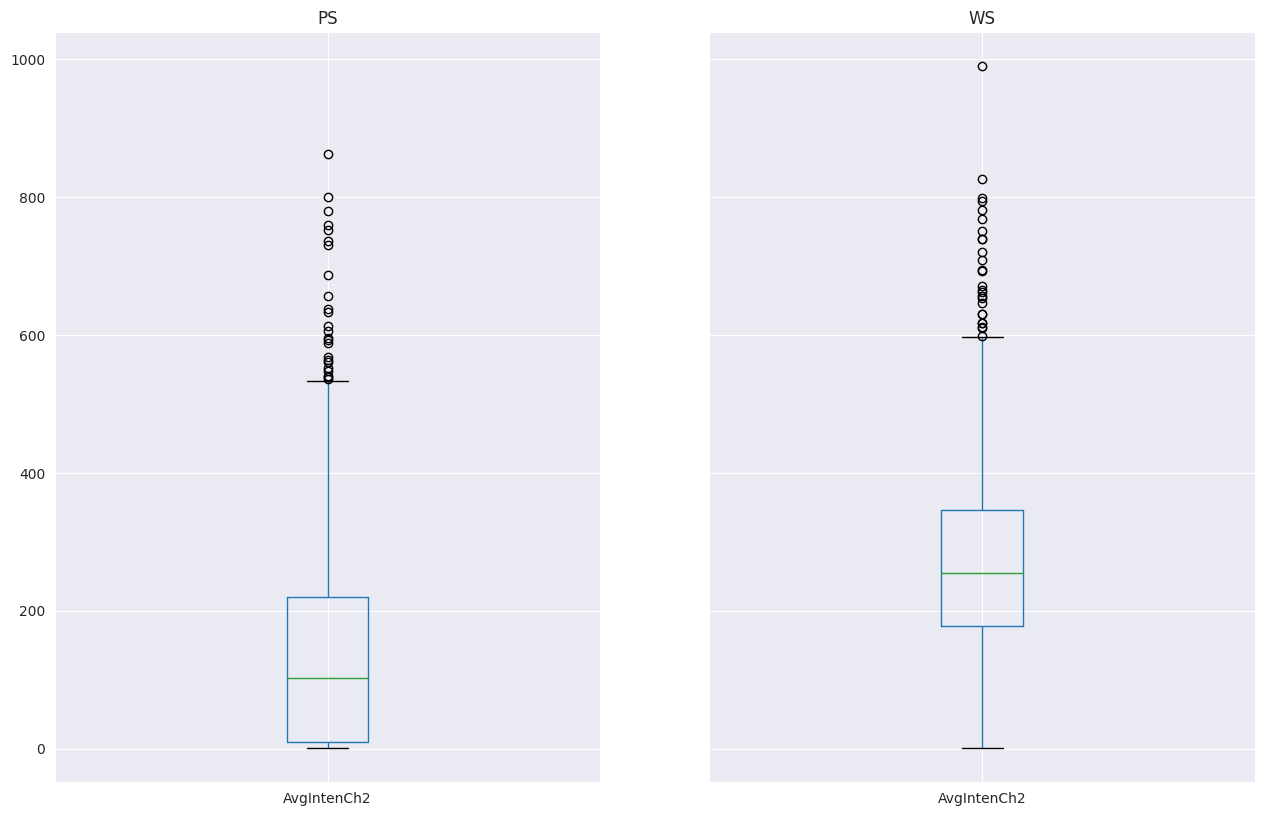

In [140]:
g[['AvgIntenCh2']].boxplot(figsize=(15, 10))

PS         AxesSubplot(0.1,0.15;0.363636x0.75)
WS    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

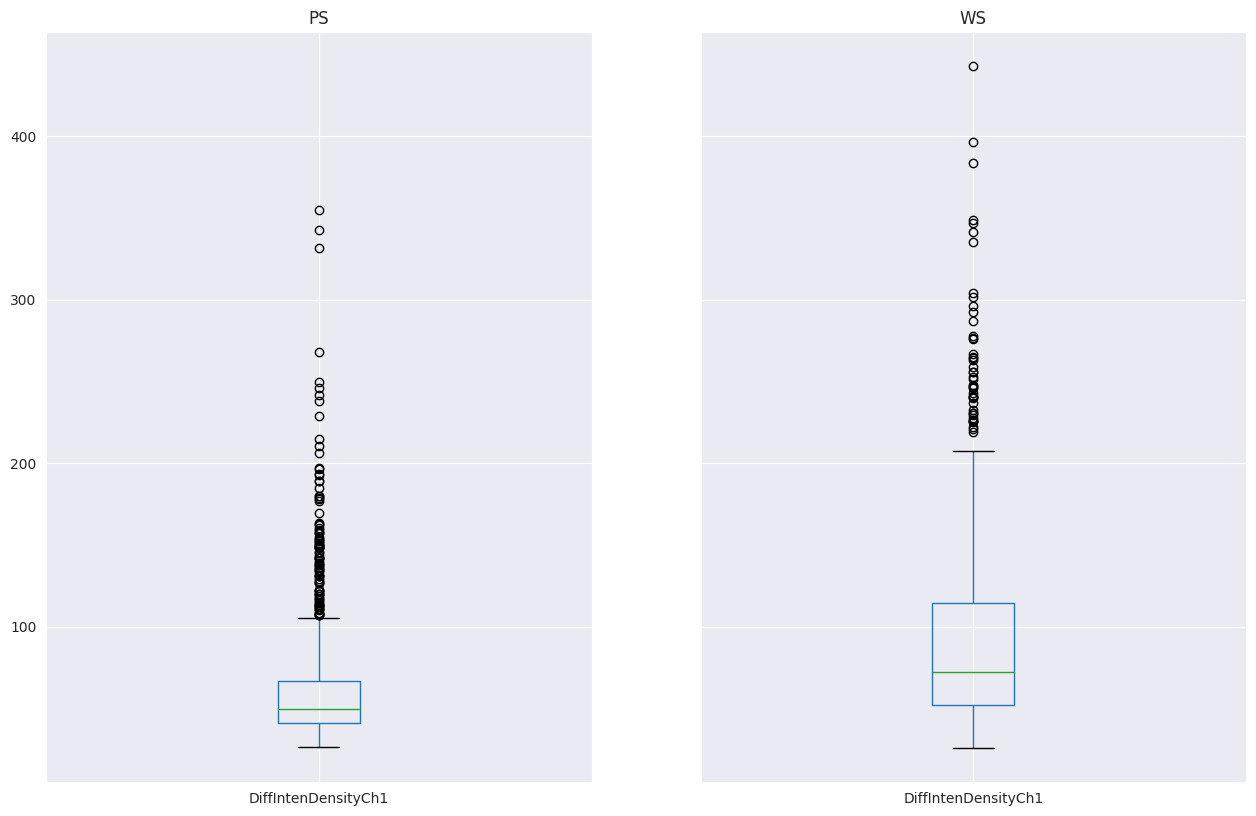

In [141]:
g[['DiffIntenDensityCh1']].boxplot(figsize=(15, 10))

PS         AxesSubplot(0.1,0.15;0.363636x0.75)
WS    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

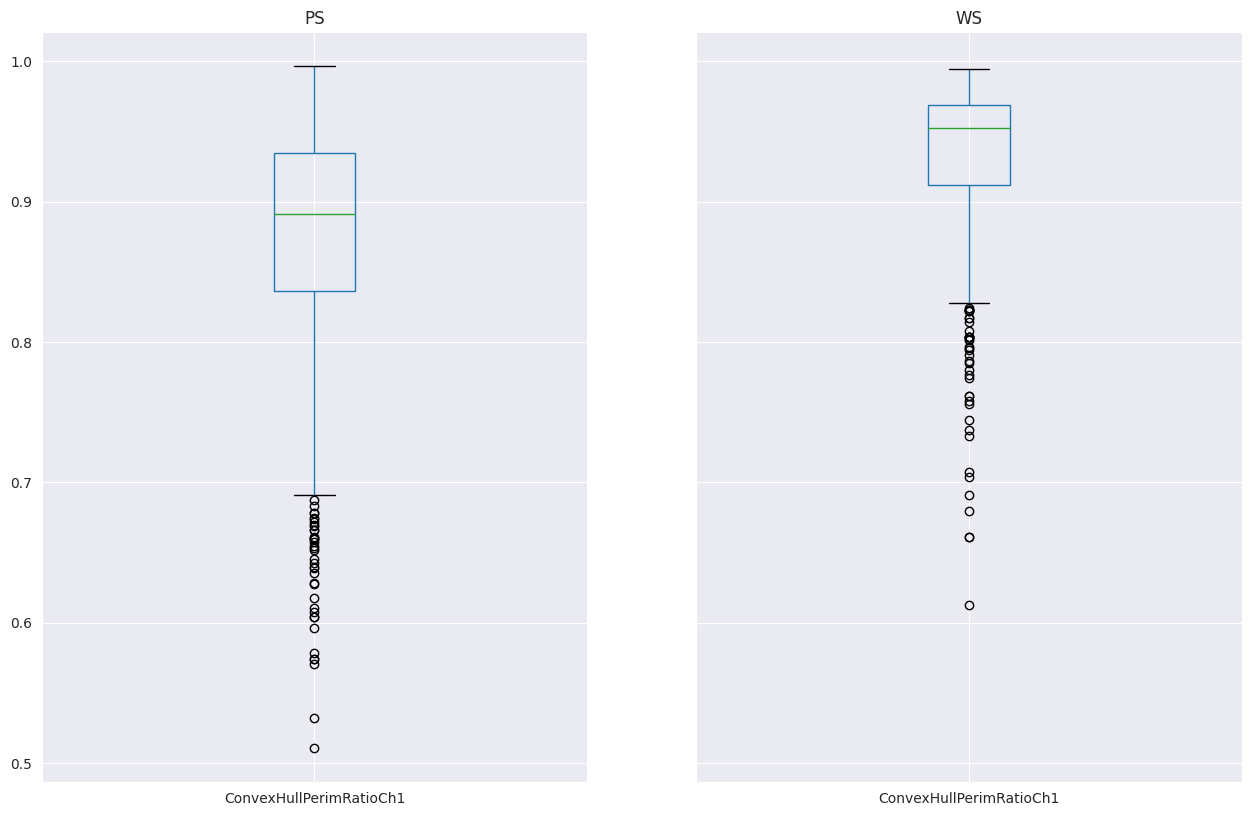

In [142]:
g[['ConvexHullPerimRatioCh1']].boxplot(figsize=(15, 10))

PS         AxesSubplot(0.1,0.15;0.363636x0.75)
WS    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

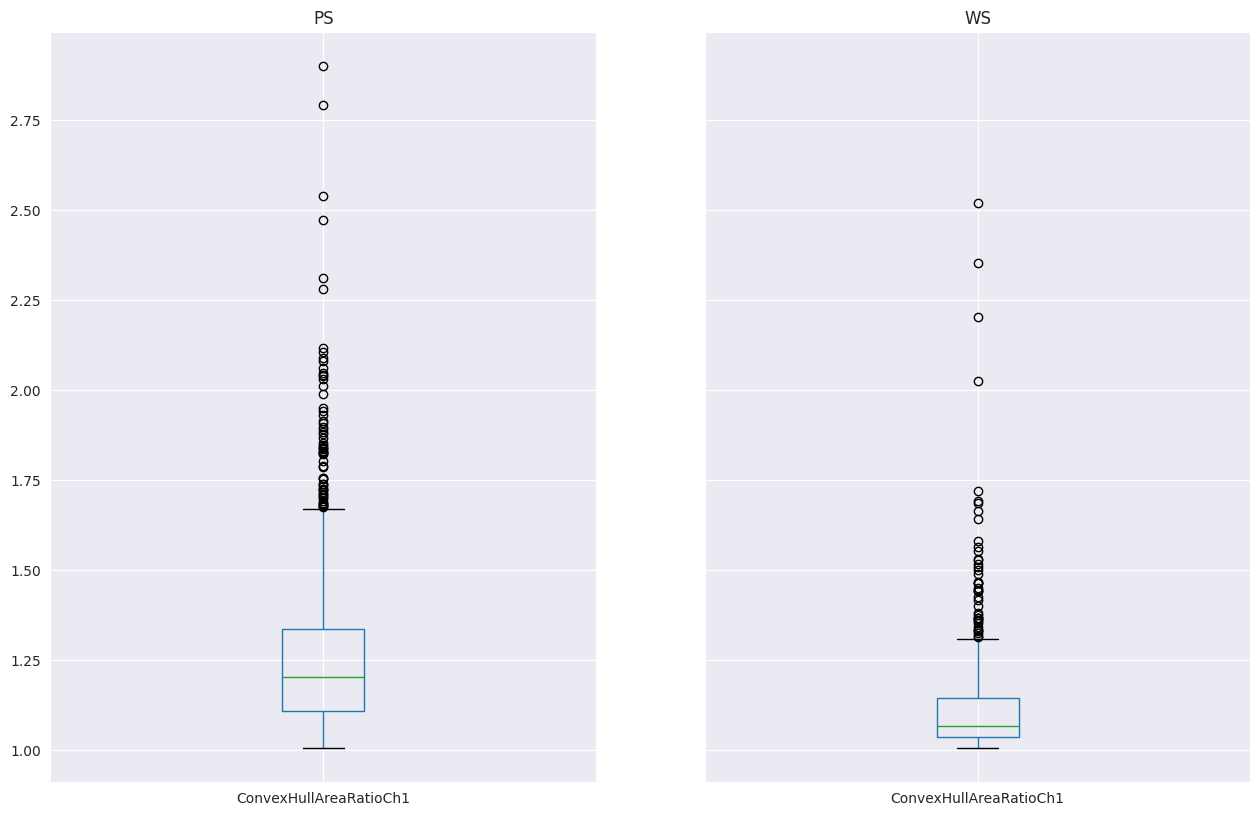

In [143]:
g[['ConvexHullAreaRatioCh1']].boxplot(figsize=(15, 10))

### 3. If you would need to distinguish the classes with those features, whichfeatures would you choose, any why?
The boxplots above show the features that can be used to differentiate between well segmented and poor segmented data entries.
- AvgIntenCh1
- AvgIntenCh2
- DiffIntenDensityCh1
- ConvexHullPerimRatioCh1
- ConvexHullAreaRatioCh1